In [49]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [12]:
image = cv2.imread("./image/212657710_200x200.jpg", cv2.IMREAD_COLOR)

### Converting the image to grayscale

True

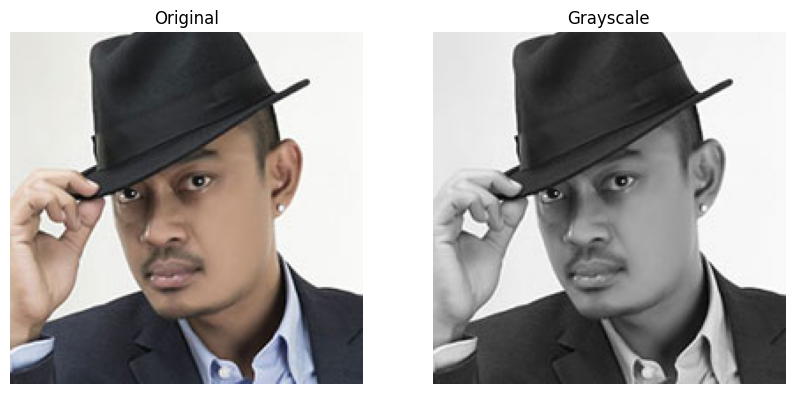

In [34]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

figure = plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap=plt.cm.gray)
plt.axis("off")
plt.title("Grayscale")

cv2.imwrite("./output/gray.jpg", gray_image)

### Image Resizing

True

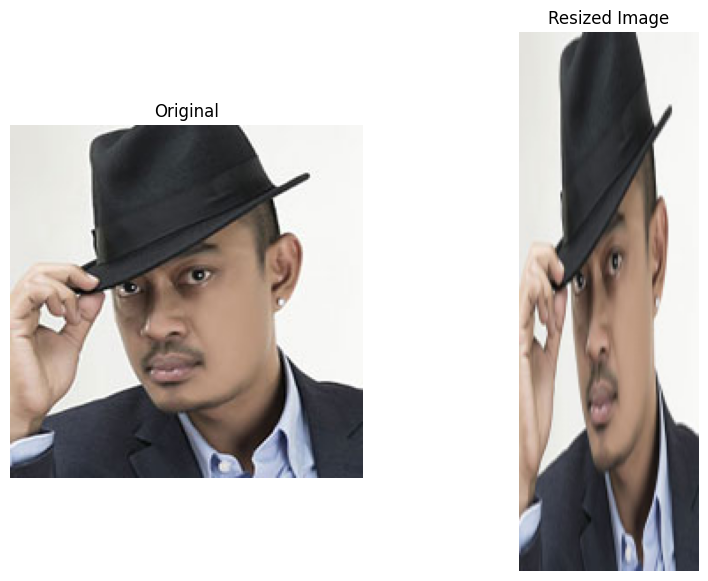

In [35]:
resized_image = cv2.resize(rgb_image, (100, 300))

figure = plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.axis("off")
plt.title("Resized Image")

cv2.imwrite("./output/resized.jpg", resized_image)

True

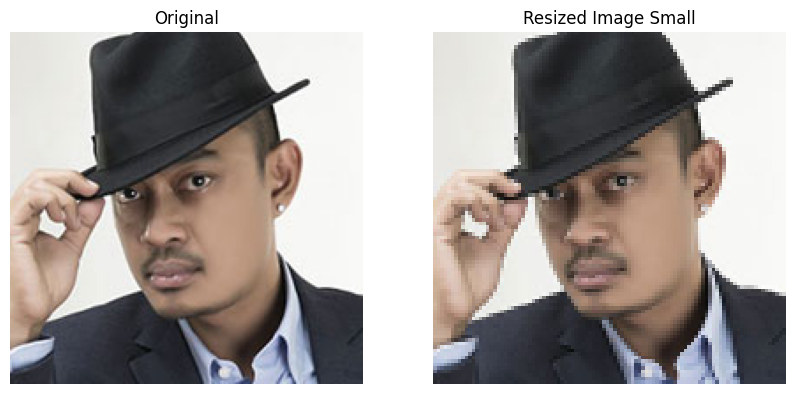

In [37]:
resized_image_small = cv2.resize(rgb_image, (100, 100))

figure = plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(resized_image_small)
plt.axis("off")
plt.title("Resized Image Small")

cv2.imwrite("./output/resized_small.jpg", resized_image_small)

True

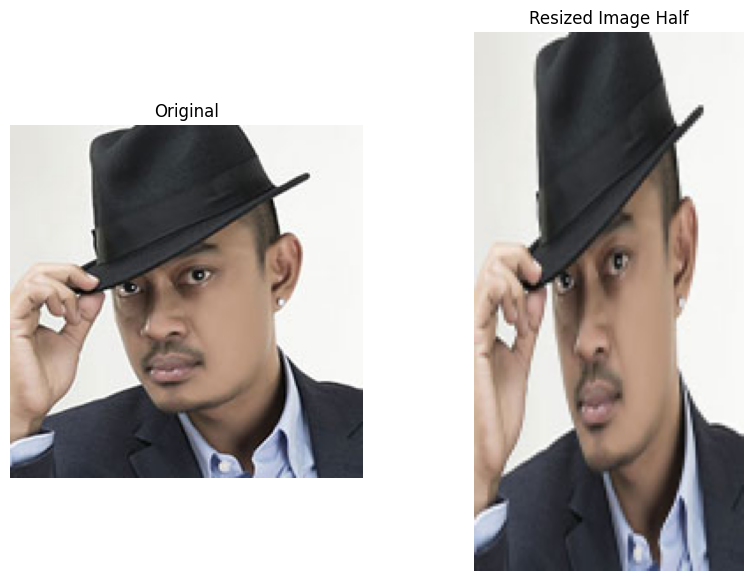

In [38]:
half_size = rgb_image.shape[0] / 2
resized_image_half = cv2.resize(rgb_image, (int(half_size), rgb_image.shape[0]))

figure = plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(resized_image_half)
plt.axis("off")
plt.title("Resized Image Half")

cv2.imwrite("./output/resized_half.jpg", resized_image_half)

### Apply sharpening and blurring with function

True

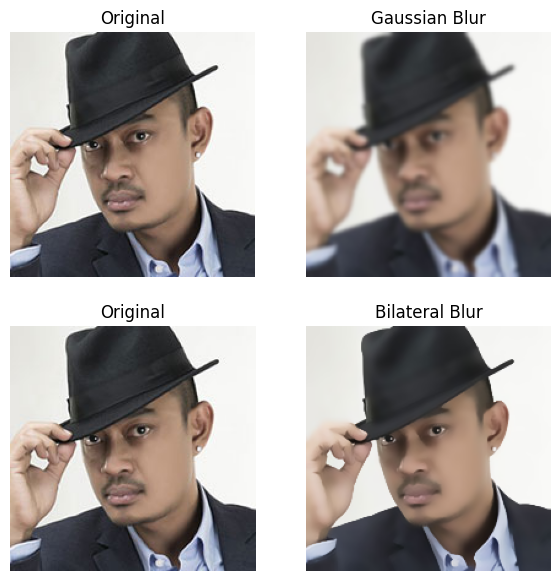

In [46]:
gaussian_blur = cv2.GaussianBlur(rgb_image, (9, 9), 0) # (5, 5) is the kernel size

bilateral_blur = cv2.bilateralFilter(rgb_image, 9, 75, 65) # - 9 filter window size, 
                                                           # - 75 control how much nearby color influence the pixel
                                                           # - 65 control how much further pixel influence the blur


figure = plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(gaussian_blur)
plt.axis("off")
plt.title("Gaussian Blur")

plt.subplot(2, 2, 3)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 4)
plt.imshow(bilateral_blur)
plt.axis("off")
plt.title("Bilateral Blur")


cv2.imwrite("./output/gaussian.jpg", gaussian_blur)
cv2.imwrite("./output/bilateral.jpg", bilateral_blur)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-440.0..366.0].


True

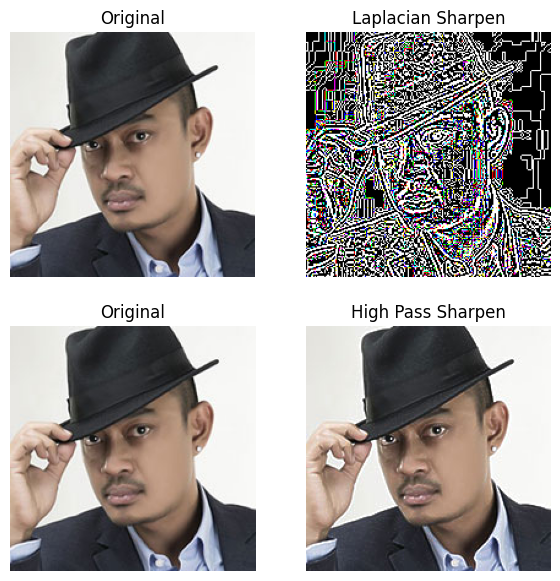

In [47]:
laplacian = cv2.Laplacian(rgb_image, cv2.CV_64F)

def high_pass_filter(image, sigma=1.0):
    """
    High pass is a sharpening technique that apply blur, then subtract the blur and applying a weight
    to allow edges and details to pass through
    """
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)


    high_pass = cv2.subtract(image, blurred)


    sharpened = cv2.addWeighted(image, 1.0, high_pass, 1.0, 0)
    return sharpened

high_pass = high_pass_filter(rgb_image)

figure = plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(laplacian)
plt.axis("off")
plt.title("Laplacian Sharpen")

plt.subplot(2, 2, 3)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 4)
plt.imshow(high_pass)
plt.axis("off")
plt.title("High Pass Sharpen")


cv2.imwrite("./output/laplacian.jpg", laplacian)
cv2.imwrite("./output/high_pass.jpg", high_pass)



### Apply sharpening and blurring with defined matrix kernel

True

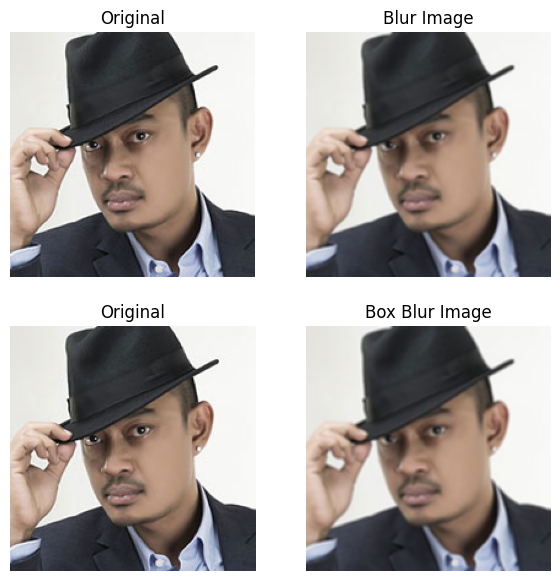

In [54]:
blur_kernel = np.array( [[0.0625, 0.125, 0.0625],
                        [0.125, 0.25, 0.125],
                        [0.0625, 0.125, 0.0625]])
box_blur = np.array([[0.11111111, 0.11111111, 0.11111111],
                     [0.11111111, 0.11111111, 0.11111111],
                     [0.11111111, 0.11111111, 0.11111111]])

blur_image =  cv2.filter2D(rgb_image, -1, blur_kernel)
box_blur_image = cv2.filter2D(rgb_image, -1, box_blur)

figure = plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(blur_image)
plt.axis("off")
plt.title("Blur Image")

plt.subplot(2, 2, 3)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 4)
plt.imshow(box_blur_image)
plt.axis("off")
plt.title("Box Blur Image")


cv2.imwrite("./output/blur.jpg", blur_image)
cv2.imwrite("./output/box_blur.jpg", box_blur_image)


True

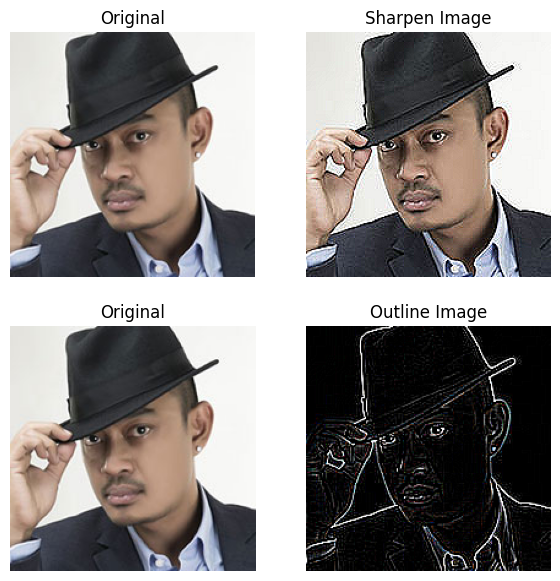

In [56]:
sharpen = np.array( [[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
outline = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])

sharpen_image =  cv2.filter2D(rgb_image, -1, sharpen)
outline_image = cv2.filter2D(rgb_image, -1, outline)

figure = plt.figure(figsize=(7, 7))

plt.subplot(2, 2, 1)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 2)
plt.imshow(sharpen_image)
plt.axis("off")
plt.title("Sharpen Image")

plt.subplot(2, 2, 3)
plt.imshow(rgb_image)
plt.axis("off")
plt.title("Original")

plt.subplot(2, 2, 4)
plt.imshow(outline_image)
plt.axis("off")
plt.title("Outline Image")


cv2.imwrite("./output/sharpen.jpg", sharpen_image)
cv2.imwrite("./output/outline.jpg", outline_image)